## Random Agent (FrozenLake-v1)


In [1]:
import importlib, sys, math, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import trange
import gymnasium as gym

#Creating the Frozen Lake 4x4 slippery environment
env = gym.make("FrozenLake-v1", is_slippery=True)

class RandomAgent:
  def __init__(self, env):
    self.env = env

  def get_action(self, state):
    return self.env.action_space.sample()

agent = RandomAgent(env)


In [2]:
# Runs a single episode
# Will rarely have reward = 1

state, info = env.reset()
done = False
epochs = 0
reward = 0

while not done:
  action = agent.get_action(state)
  next_state, reward, terminated, truncated, info = env.step(action)

  done = terminated or truncated
  state = next_state
  epochs += 1

print("Steps:", epochs)
print("Reward:", reward)

Steps: 7
Reward: 0


In [3]:
# evaluating the random agent over many episodes

n_episodes = 500

steps_list = []
success_list = []

for episode in range(n_episodes):
  state, info = env.reset()
  done = False
  epochs = 0

  while not done:
    action = agent.get_action(state)
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    state = next_state
    epochs += 1

  steps_list.append(epochs)
  success_list.append(1 if reward == 1 else 0)


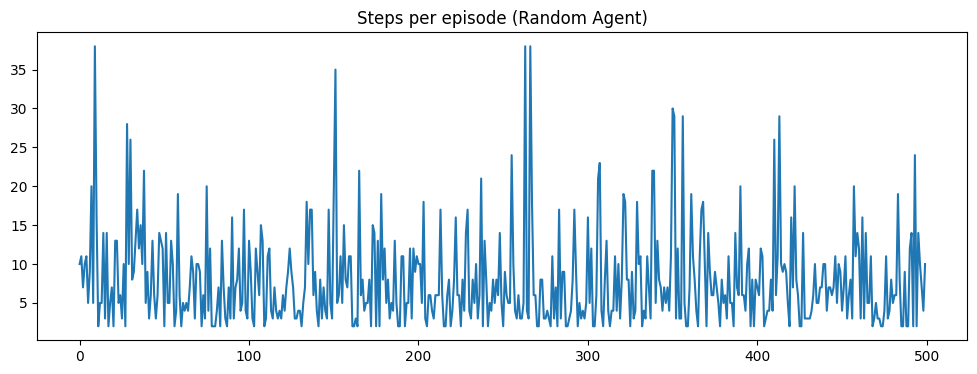

In [4]:
#plotting performance (Steps per episode)

plt.figure(figsize=(12,4))
plt.title("Steps per episode (Random Agent)")
pd.Series(steps_list).plot(kind="line")
plt.show()


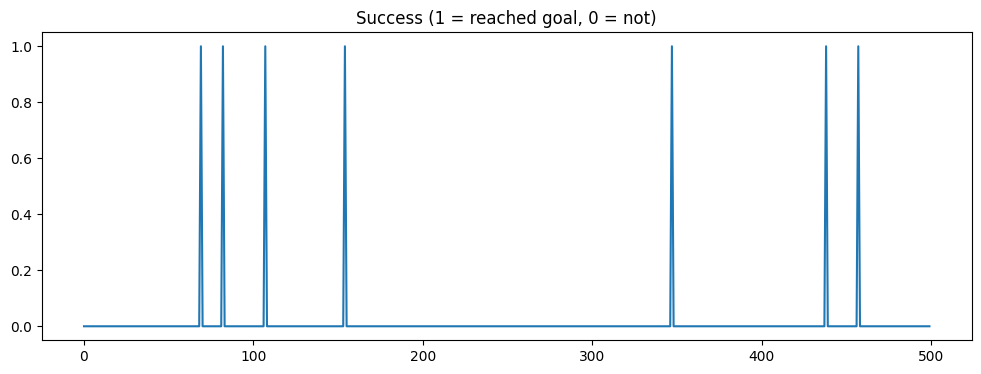

Average steps: 7.898
Success rate: 1.4000000000000001 %


In [5]:
#plotting success rate

plt.figure(figsize=(12,4))
plt.title("Success (1 = reached goal, 0 = not)")
pd.Series(success_list).plot(kind="line")
plt.show()

print("Average steps:", np.mean(steps_list))
print("Success rate:", np.mean(success_list) * 100, "%")